# Pandas: exploring, loading and saving data
- selection and slicing: selecting columns and rows
- adding rows and columns
- understanding the data
- selecting based on a criteria

In [1]:
# Import pandas library
import pandas as pd
import os, glob

## Two ways of creating the same DataFrame

### Creating a dictionary containing employee data and defining a DataFrame from it

In [10]:
data = {'Num':[1, 2, 3, 4, 5, 6],
        'Name':['Trevor', 'Princi', 'Peter', 'Gaurav', 'Anuj', "Peter"],
        'Age':[27, 24, 50, 22, 32, 25],
        'City':['London', 'Paris', "Lisbon", 'Paris', 'Paris', "Madrid"],
        'Degree':['MSc', 'MA', "PhD", 'MCA', 'Phd', "MSc"]
       }
data

{'Num': [1, 2, 3, 4, 5, 6],
 'Name': ['Trevor', 'Princi', 'Peter', 'Gaurav', 'Anuj', 'Peter'],
 'Age': [27, 24, 50, 22, 32, 25],
 'City': ['London', 'Paris', 'Lisbon', 'Paris', 'Paris', 'Madrid'],
 'Degree': ['MSc', 'MA', 'PhD', 'MCA', 'Phd', 'MSc']}

In [11]:
df = pd.DataFrame(data)
df

,Num,Name,Age,City,Degree
0,1,Trevor,27,London,MSc
1,2,Princi,24,Paris,MA
2,3,Peter,50,Lisbon,PhD
3,4,Gaurav,22,Paris,MCA
4,5,Anuj,32,Paris,Phd
5,6,Peter,25,Madrid,MSc


### Creating a DataFrame from a list of records

In [14]:
data = [
    [1, 'Trevor', 27, 'London', 'MSc'],
    [2, 'Princi', 24, 'Paris', 'MA'],
    [3, 'Peter', 50, 'Lisbon', 'PhD'],
    [4, 'Gaurav', 22, 'Paris', 'MCA'],
    [5, 'Anuj', 32, 'Paris', 'Phd'],
    [6, 'Peter', 25, 'Madrid', 'MSc']
]
df = pd.DataFrame(data, columns=["Num", "Name", "Age", "City", "Degree"])
df

,Num,Name,Age,City,Degree
0,1,Trevor,27,London,MSc
1,2,Princi,24,Paris,MA
2,3,Peter,50,Lisbon,PhD
3,4,Gaurav,22,Paris,MCA
4,5,Anuj,32,Paris,Phd
5,6,Peter,25,Madrid,MSc


Actually, we could create the same DataFrame in many other ways ...

In [13]:
df = df.set_index("Num")
df

,Name,Age,City,Degree
Num,,,,
1,Trevor,27,London,MSc
2,Princi,24,Paris,MA
3,Peter,50,Lisbon,PhD
4,Gaurav,22,Paris,MCA
5,Anuj,32,Paris,Phd
6,Peter,25,Madrid,MSc


## Accessing elements

selecting columns ...

In [15]:
df["Name"]

,Name
0,Trevor
1,Princi
2,Peter
3,Gaurav
4,Anuj
5,Peter


In [16]:
# selects two columns
df[['Name', 'Degree']]

,Name,Degree
0,Trevor,MSc
1,Princi,MA
2,Peter,PhD
3,Gaurav,MCA
4,Anuj,Phd
5,Peter,MSc


### Indexers: iloc, loc
When selecting rows, slicing and indexing conventions can be a source of confusion...
- iloc: implicit integer index (positions in a vector)
- loc : explicit integer index (uses the actual index value)

In [17]:
df

,Num,Name,Age,City,Degree
0,1,Trevor,27,London,MSc
1,2,Princi,24,Paris,MA
2,3,Peter,50,Lisbon,PhD
3,4,Gaurav,22,Paris,MCA
4,5,Anuj,32,Paris,Phd
5,6,Peter,25,Madrid,MSc


In [18]:
# implicit index when slicing
df.iloc[1:3]

,Num,Name,Age,City,Degree
1,2,Princi,24,Paris,MA
2,3,Peter,50,Lisbon,PhD


In [19]:
# explicit index when slicing
df.loc[1:3]

,Num,Name,Age,City,Degree
1,2,Princi,24,Paris,MA
2,3,Peter,50,Lisbon,PhD
3,4,Gaurav,22,Paris,MCA


In [20]:
# Will it use implitic or explicit indexing?
df[1:3]

,Num,Name,Age,City,Degree
1,2,Princi,24,Paris,MA
2,3,Peter,50,Lisbon,PhD


In [21]:
# implicit integer index
df.iloc[1]

,1
Num,2
Name,Princi
Age,24
City,Paris
Degree,MA


In [22]:
# explicit index when indexing
df.loc[1]

,1
Num,2
Name,Princi
Age,24
City,Paris
Degree,MA


Two ways of getting the same value...

In [23]:
df.loc[4]["Age"]

32

In [24]:
df.loc[4, "Age"]

32

## Adding a new column

In [25]:
df["Country"] = ["IN","FR","PT","FR","FR","SP"]
df["Score"] = [18, 16, 19, 20, 16, 18]
df

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
1,2,Princi,24,Paris,MA,FR,16
2,3,Peter,50,Lisbon,PhD,PT,19
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
5,6,Peter,25,Madrid,MSc,SP,18


## Adding rows

In [29]:
df.loc["Mike"] = [7,"Michael", 33, "London", "MA", "UK", 15]
df

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
1,2,Princi,24,Paris,MA,FR,16
2,3,Peter,50,Lisbon,PhD,PT,19
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
5,6,Peter,25,Madrid,MSc,SP,18
Mike,7,Michael,33,London,MA,UK,15


## Check if a value exists

In [30]:
'Mike' in df.index

True

In [31]:
# How is this possible ?
'Mike' in df["City"]

True

In [32]:
'Mike' in df["City"].values

False

## Changing Rows

In [34]:
df.loc["Mike", "Age"] += 1
df

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
1,2,Princi,24,Paris,MA,FR,16
2,3,Peter,50,Lisbon,PhD,PT,19
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
5,6,Peter,25,Madrid,MSc,SP,18
Mike,7,Michael,35,London,MA,UK,15


In [37]:
df.loc[1] = [1,"Pierre", 21, "Avignon", "MA", "BR", 14]
df

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
1,1,Pierre,21,Avignon,MA,BR,14
2,3,Peter,50,Lisbon,PhD,PT,19
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
5,6,Peter,25,Madrid,MSc,SP,18
Mike,7,Michael,35,London,MA,UK,15


In [39]:
# Note that the following won't work as expected: We are extracting a series and changing only that series
df.iloc[1]["Age"] += 1
df

<ipython-input-39-1d8f01bc45d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1]["Age"] += 1


,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
1,1,Pierre,21,Avignon,MA,BR,14
2,3,Peter,50,Lisbon,PhD,PT,19
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
5,6,Peter,25,Madrid,MSc,SP,18
Mike,7,Michael,35,London,MA,UK,15


## Understanding your data

In [40]:
df.describe()

,Num,Age,Score
count,7.000000,7.000000,7.000000
mean,3.857143,30.285714,17.142857
std,2.340126,10.061714,2.193063
min,1.000000,21.000000,14.000000
25%,2.000000,23.500000,15.500000
50%,4.000000,27.000000,18.000000
75%,5.500000,33.500000,18.500000
max,7.000000,50.000000,20.000000


In [41]:
df.head(3)

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
1,1,Pierre,21,Avignon,MA,BR,14
2,3,Peter,50,Lisbon,PhD,PT,19


In [42]:
df.tail()

,Num,Name,Age,City,Degree,Country,Score
2,3,Peter,50,Lisbon,PhD,PT,19
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
5,6,Peter,25,Madrid,MSc,SP,18
Mike,7,Michael,35,London,MA,UK,15


In [43]:
df[["City","Country"]].value_counts()

City     Country
Paris    FR         2
Avignon  BR         1
Lisbon   PT         1
London   IN         1
         UK         1
Madrid   SP         1
Name: count, dtype: int64

In [44]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

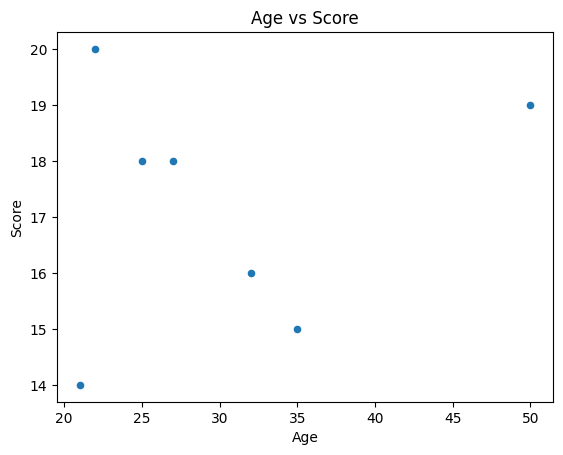

In [45]:
df.plot(kind='scatter', x='Age', y='Score', title='Age vs Score');

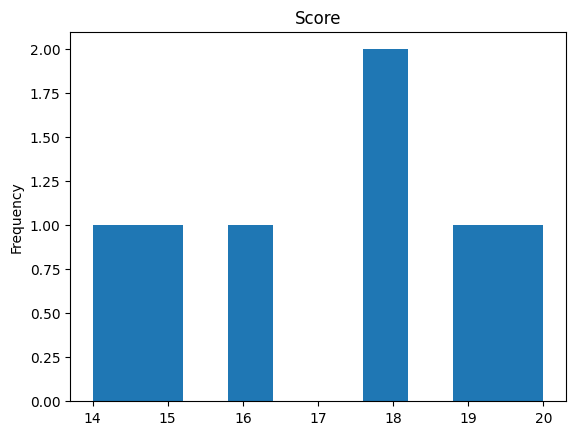

In [46]:
df['Score'].plot(kind='hist', title='Score');
#df['Score'].plot(kind='line', title='Score');
#df['Score'].plot(kind='bar', title='Score');

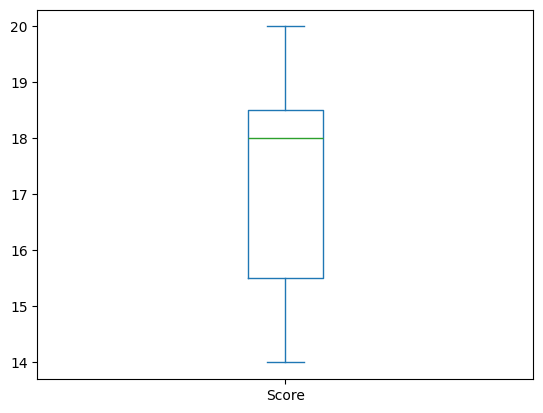

In [47]:
df['Score'].plot(kind="box");

## Selecting data based on criteria

In [48]:
df["City"] == "Paris"

,City
0,False
1,False
2,False
3,True
4,True
5,False
Mike,False


In [49]:
df[df["City"] == "Paris"]

,Num,Name,Age,City,Degree,Country,Score
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16


In [50]:
df[ df["City"] == "Paris" ]["Age"].mean()

27.0

In [51]:
(df["City"] == "Paris") | (df["City"] == "London")

,City
0,True
1,False
2,False
3,True
4,True
5,False
Mike,True


In [52]:
df[ (df["City"] == "Paris") | (df["City"] == "London") ]

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
Mike,7,Michael,35,London,MA,UK,15


In [53]:
df[ df["City"].isin(["Paris", "London"]) ]

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
Mike,7,Michael,35,London,MA,UK,15


In [54]:
df[ (df["City"].isin(["Paris", "London"])) & ( df["Age"] > 25 ) ]

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
4,5,Anuj,32,Paris,Phd,FR,16
Mike,7,Michael,35,London,MA,UK,15


# Reading data from a file and writing data to a file

### Writing to CSV, JSON, Excel and SQL files

If you are using google colab, the following code can be used to access folders in your Google Drive

In [55]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [56]:
if not os.path.exists('data'):
    os.makedirs('data')

It’s quite simple to save and load data from various file formats into a DataFrame.

In [57]:
df.to_csv('data/people.csv')
#files.download('data/people.csv')

In [58]:
df.to_json('data/people.json')

### Reading from CSV files

In [59]:
df2 = pd.read_csv('data/people.csv')
df2

,Unnamed: 0,Num,Name,Age,City,Degree,Country,Score
0,0,1,Trevor,27,London,MSc,IN,18
1,1,1,Pierre,21,Avignon,MA,BR,14
2,2,3,Peter,50,Lisbon,PhD,PT,19
3,3,4,Gaurav,22,Paris,MCA,FR,20
4,4,5,Anuj,32,Paris,Phd,FR,16
5,5,6,Peter,25,Madrid,MSc,SP,18
6,Mike,7,Michael,35,London,MA,UK,15


CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [60]:
df2 = pd.read_csv('data/people.csv', index_col="Num")
df2

,Unnamed: 0,Name,Age,City,Degree,Country,Score
Num,,,,,,,
1,0,Trevor,27,London,MSc,IN,18
1,1,Pierre,21,Avignon,MA,BR,14
3,2,Peter,50,Lisbon,PhD,PT,19
4,3,Gaurav,22,Paris,MCA,FR,20
5,4,Anuj,32,Paris,Phd,FR,16
6,5,Peter,25,Madrid,MSc,SP,18
7,Mike,Michael,35,London,MA,UK,15


If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

### Reading data from JSON

If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

In [61]:
df2 = pd.read_json('data/people.json')
df2

<ipython-input-61-81a4b776736e>:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df2 = pd.read_json('data/people.json')
<ipython-input-61-81a4b776736e>:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df2 = pd.read_json('data/people.json')
<ipython-input-61-81a4b776736e>:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
1,1,Pierre,21,Avignon,MA,BR,14
2,3,Peter,50,Lisbon,PhD,PT,19
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
5,6,Peter,25,Madrid,MSc,SP,18
Mike,7,Michael,35,London,MA,UK,15


Just like with CSVs, we could pass index_col='name', but we can also set an index after-the-fact:

In [62]:
df2 = df2.set_index('Name')
df2

,Num,Age,City,Degree,Country,Score
Name,,,,,,
Trevor,1,27,London,MSc,IN,18
Pierre,1,21,Avignon,MA,BR,14
Peter,3,50,Lisbon,PhD,PT,19
Gaurav,4,22,Paris,MCA,FR,20
Anuj,5,32,Paris,Phd,FR,16
Peter,6,25,Madrid,MSc,SP,18
Michael,7,35,London,MA,UK,15


### Reading and writing Excel files

Warning: the openpyxl library is required. You can do so using the following command

In [63]:
df.to_excel('data/people.xlsx')

In [64]:
df2 = pd.read_excel('data/people.xlsx', index_col=0)
df2

,Num,Name,Age,City,Degree,Country,Score
0,1,Trevor,27,London,MSc,IN,18
1,1,Pierre,21,Avignon,MA,BR,14
2,3,Peter,50,Lisbon,PhD,PT,19
3,4,Gaurav,22,Paris,MCA,FR,20
4,5,Anuj,32,Paris,Phd,FR,16
5,6,Peter,25,Madrid,MSc,SP,18
Mike,7,Michael,35,London,MA,UK,15


### Reading and writing to a SQL database

If you’re working with data from a SQL database you need to first establish a connection using an appropriate Python library, then pass a query to pandas. Here we'll use SQLite to demonstrate.

In [65]:
import sqlite3
con = sqlite3.connect("data/people.sqlite3")
df2 = pd.read_sql_query("SELECT * FROM people", con) # index_col='index'
df2

DatabaseError: Execution failed on sql 'SELECT * FROM people': no such table: people